In [1]:
import pandas as pd

In [2]:
fire = pd.read_csv("classified_data2.csv")


In [3]:
fire

,latitude,longitude,acq_time,YEAR,month,day,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,8,11,21,4
1,0.1272,37.5555,2023,2001,8,11,21,2
2,-0.0990,37.4320,843,2001,9,13,21,2
3,-0.1280,37.4616,843,2001,9,13,21,3
4,-0.1350,37.4570,843,2001,9,13,21,3
...,...,...,...,...,...,...,...,...
1304,0.1093,37.2822,756,2022,4,29,88,1
1305,0.1203,37.4401,811,2022,8,24,88,1
1306,-0.4139,36.9572,1141,2022,9,24,88,1
1307,0.0992,37.7738,745,2022,9,29,88,1


In [4]:
df = pd.DataFrame(fire)

In [5]:
df

,latitude,longitude,acq_time,YEAR,month,day,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,8,11,21,4
1,0.1272,37.5555,2023,2001,8,11,21,2
2,-0.0990,37.4320,843,2001,9,13,21,2
3,-0.1280,37.4616,843,2001,9,13,21,3
4,-0.1350,37.4570,843,2001,9,13,21,3
...,...,...,...,...,...,...,...,...
1304,0.1093,37.2822,756,2022,4,29,88,1
1305,0.1203,37.4401,811,2022,8,24,88,1
1306,-0.4139,36.9572,1141,2022,9,24,88,1
1307,0.0992,37.7738,745,2022,9,29,88,1


In [6]:
# Aggregating data
years_agg = df.groupby('YEAR')['ANN'].count()
months_agg = df.groupby('month')['ANN'].count()
lisa_cluster_counts = df['LISA_cluster'].value_counts().sort_index()

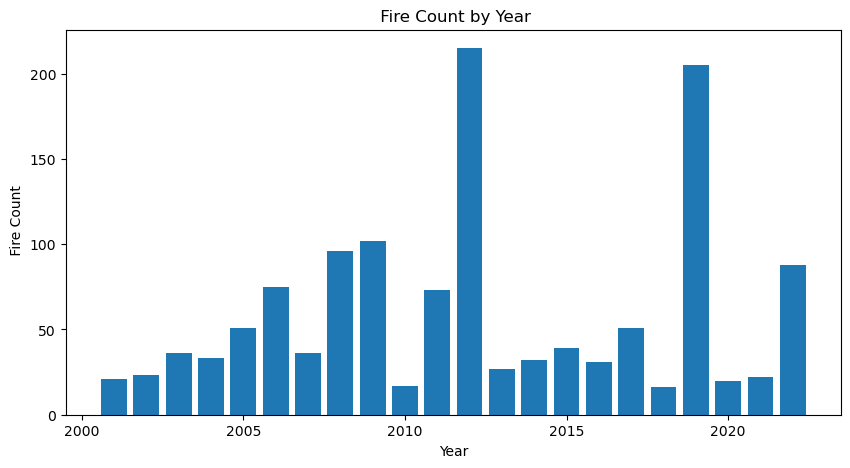

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt


# Plotting YEAR vs ANN
plt.figure(figsize=(10, 5))
plt.bar(years_agg.index, years_agg.values)
plt.xlabel('Year')
plt.ylabel(' Fire Count')
plt.title(' Fire Count by Year')
plt.show()

plt.savefig("Fire Count by YEAR", dpi=300, bbox_inches = 'tight')

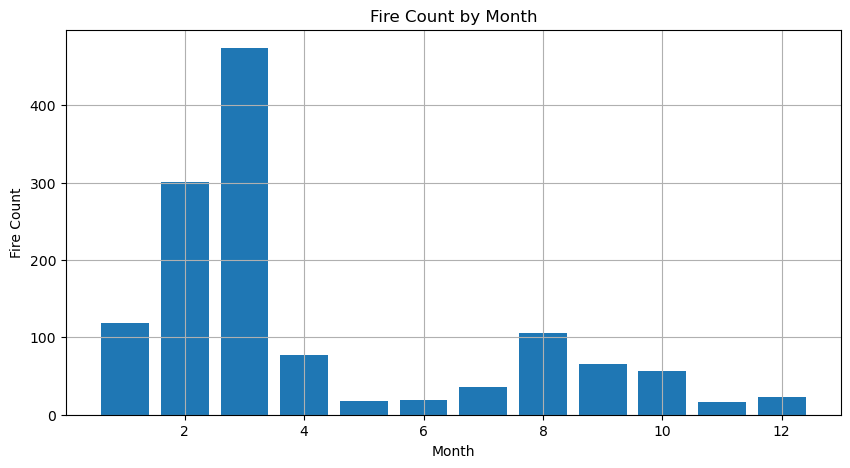

<Figure size 640x480 with 0 Axes>

In [8]:
# Plotting month vs ANN count
plt.figure(figsize=(10, 5))
plt.bar(months_agg.index, months_agg.values)
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Count by Month')
plt.grid(True)
plt.show()

plt.savefig("Fire Count by Month", dpi=300, bbox_inches = 'tight')

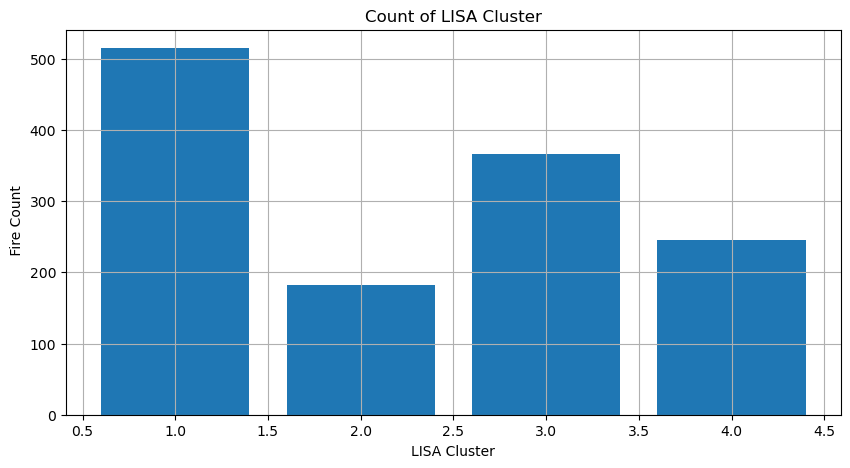

<Figure size 640x480 with 0 Axes>

In [9]:

# Plotting LISA_cluster counts
plt.figure(figsize=(10, 5))
plt.bar(lisa_cluster_counts.index, lisa_cluster_counts.values)
plt.xlabel('LISA Cluster')
plt.ylabel(' Fire Count')
plt.title('Count of LISA Cluster')
plt.grid(True)
plt.show()

plt.savefig("LISA Cluster Count", dpi=300, bbox_inches = 'tight')

In [10]:
#TIME SERIES ANALYSIS

In [11]:
df = pd.DataFrame(fire)

In [12]:
# Group by year and sum ANN values
annual_ann = df.groupby('YEAR')['ANN'].count()

In [13]:
annual_ann

YEAR
2001     21
2002     23
2003     36
2004     33
2005     51
2006     75
2007     36
2008     96
2009    102
2010     17
2011     73
2012    215
2013     27
2014     32
2015     39
2016     31
2017     51
2018     16
2019    205
2020     20
2021     22
2022     88
Name: ANN, dtype: int64

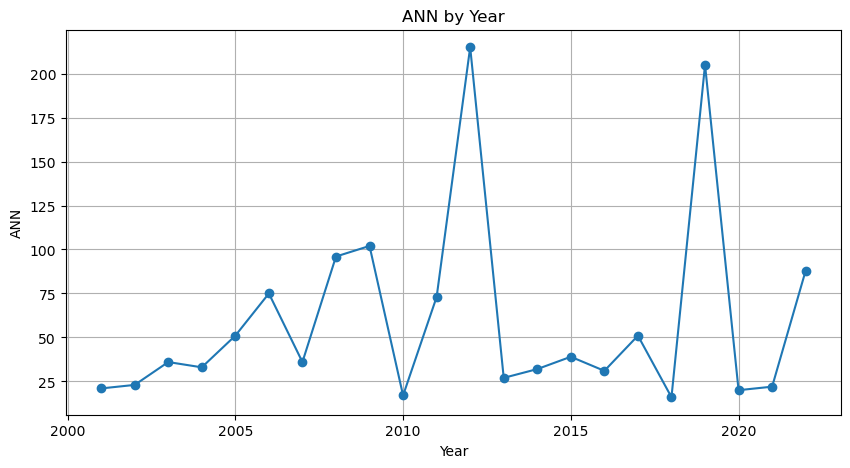

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(annual_ann.index, annual_ann.values, marker='o')
plt.xlabel('Year')
plt.ylabel('ANN')
plt.title('ANN by Year')
plt.grid(True)
plt.show()




In [15]:
from scipy.fft import fft
import numpy as np

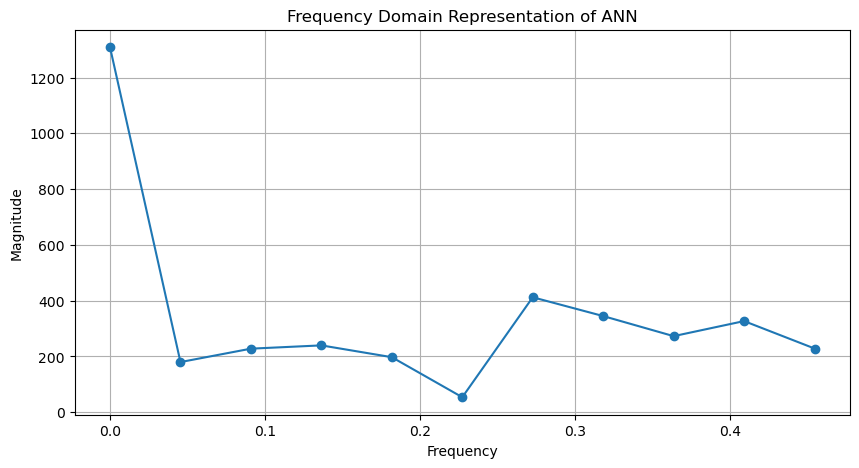

<Figure size 640x480 with 0 Axes>

In [16]:
# Perform FFT
ann_values = annual_ann.values
fft_values = fft(ann_values)

# Calculate frequencies
n = len(ann_values)
timestep = 1  # assuming yearly data
frequencies = np.fft.fftfreq(n, d=timestep)

# Only take the positive frequencies
mask = frequencies >= 0
frequencies = frequencies[mask]
fft_values = fft_values[mask]

# Plot the frequency domain representation
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(fft_values), marker='o',)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation of ANN')
plt.grid(True)
plt.show()

plt.savefig("Frequency Domain ANN", dpi=300, bbox_inches = 'tight')

In [17]:
# Group by year and sum ANN values
monthly_ann = df.groupby('month')['ANN'].count()

In [18]:
monthly_ann

month
1     118
2     301
3     474
4      77
5      18
6      19
7      36
8     105
9      65
10     57
11     16
12     23
Name: ANN, dtype: int64

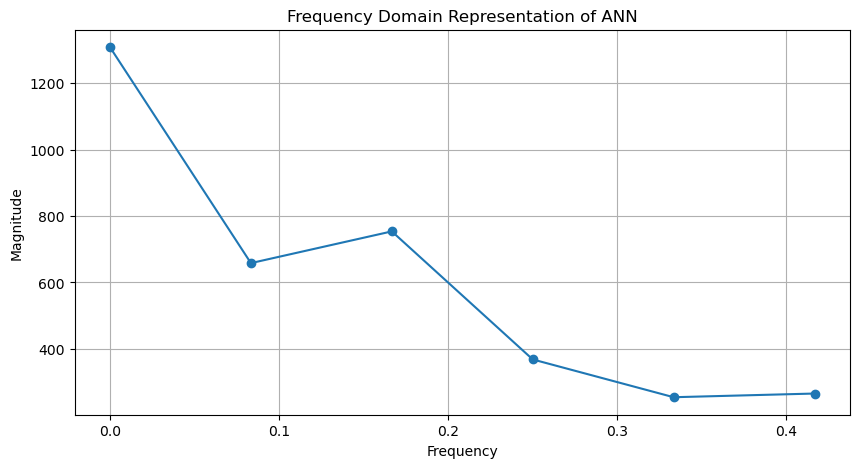

In [19]:
# Perform FFT
ann_values = monthly_ann.values
fft_values = fft(monthly_ann)

# Calculate frequencies
n = len(ann_values)
timestep = 1  # assuming monthly data
frequencies = np.fft.fftfreq(n, d=timestep)

# Only take the positive frequencies
mask = frequencies >= 0
frequencies = frequencies[mask]
fft_values = fft_values[mask]

# Plot the frequency domain representation
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(fft_values), marker='o')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation of ANN')
plt.grid(True)
plt.show()

In [20]:
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
fire = pd.read_csv("classified_data2.csv")
df = pd.DataFrame(fire)


# Group by year and sum ANN values
annual_ann = df.groupby('YEAR')['ANN'].count()

# Convert the Series to a DataFrame
annual_ann_df = annual_ann.reset_index()

# Save the resulting DataFrame to a CSV file
annual_ann_df.to_csv('annual_ann.csv', index=False)

print("CSV file saved as 'annual_ann.csv'")


CSV file saved as 'annual_ann.csv'


In [21]:
Fire = pd.read_csv('annual_ann.csv')

In [22]:
Fire

,YEAR,ANN
0,2001,21
1,2002,23
2,2003,36
3,2004,33
4,2005,51
5,2006,75
6,2007,36
7,2008,96
8,2009,102
9,2010,17
